<a href="https://colab.research.google.com/github/IshanBhattOfficial/Data-extraction-from-image/blob/master/ExOP_PUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##To check if GPU acceleration is enabled
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


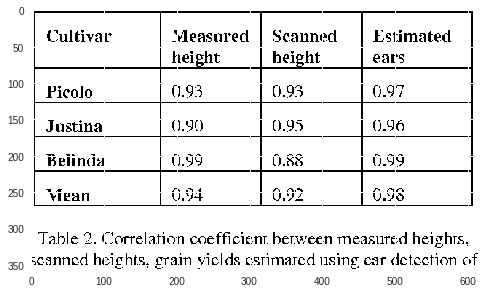

In [15]:
## Use this cell to fetch the image if you are not ishan bhatt using image's live URL
from PIL import Image
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt

url = "https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/6c45b5f5481125a311ea46a05e7acfa1de0f2cfb/3-Table2-1.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
#plt.imsave
plt.imsave("TheImage.png", img)

In [0]:
## Dont run if you are not ishan
## Mounting Ishan Bhatt's google drive to Colab environment
## This code is useful if we want to fetch images from google drive instead of URL  
"""
from google.colab import drive
drive.mount("/content/drive")
"""

In [0]:
## Dont run if you are not ishan
## fetching image from Ishan Bhatt's google drive
"""
import cv2
import matplotlib.pyplot as plt

plt.imshow(img)

"""


In [16]:
##installing google OCR engine : tesseract
!pip3 install pytesseract


In [0]:
##importing Tesseract
import pytesseract 
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [0]:
### DONT RUN
from PIL import Image

text = ""
output = !python3 /usr/local/bin/pytesseract -l eng temp.png

for i in output:
  text += str(i)
  
print (text)

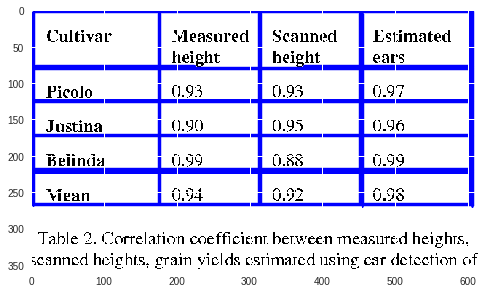

In [18]:
import numpy as np
import cv2

gray = cv2.imread('TheImage.png')
gray_temp = cv2.imread('TheImage.png')

edges = cv2.Canny(gray_temp,50,100,apertureSize = 3)
# 50 = minThreshold; 100 = maxThreshold; Sobel Kernel size = 3x3
plt.imshow(edges)
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=150,lines=np.array([]), minLineLength = 100 ,maxLineGap=5)

a,b,c = lines.shape
for i in range(a):
    cv2.line(gray_temp, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(gray_temp)
plt.imsave("edgesDetected.png", gray)

In [19]:
## NO NEED TO RUN
print(lines[:,0])

[[  5   1 605   1]
 [  3 222 606 222]
 [  3 125 606 125]
 [375  77 606  77]
 [  3  80 606  80]
 [  3 172 606 172]
 [  3 267 606 267]
 [  3 219 606 219]
 [  3 268   3   3]
 [314 266 314   4]
 [176 266 176   4]
 [603 266 603   4]
 [455 269 455   5]
 [606 269 606   2]
 [452 266 452   4]
 [  6  77 224  77]]


In [20]:
horizontal_cuts = []
vertical_cuts = []

for line in lines[:,0]:
  if line[0] == line[2]:
    vertical_cuts.append(line[0])
  else:
    horizontal_cuts.append(line[1])
    
horizontal_cuts = sorted(list(set(horizontal_cuts)))
vertical_cuts = sorted(list(set(vertical_cuts)))

#print(horizontal_cuts)
#print(vertical_cuts)

h_cuts, v_cuts = [i for i in horizontal_cuts], [i for i in vertical_cuts]

for i in range(len(horizontal_cuts)-1):
  if horizontal_cuts[i+1] - horizontal_cuts[i] < 40:
    h_cuts.remove(horizontal_cuts[i])
#h_cuts.append(horizontal_cuts[-1])
for i in range(len(vertical_cuts)-1):
  if vertical_cuts[i+1] - vertical_cuts[i] < 100:
    v_cuts.remove(vertical_cuts[i])

print("H-CUTS", h_cuts)
print("V-CUTS", v_cuts)

H-CUTS [1, 80, 125, 172, 222, 267]
V-CUTS [3, 176, 314, 455, 606]


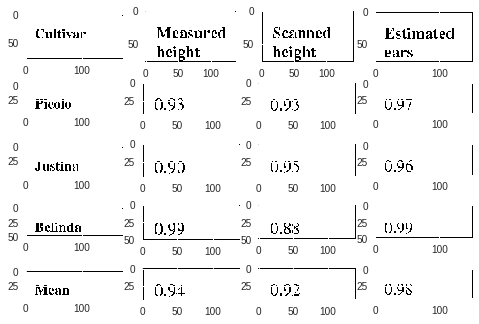

In [21]:
n_rows = len(h_cuts) -1
n_cols = len(v_cuts) -1
cnt =1
for i in range(n_rows):
  for j in range(n_cols):
    plt.subplot(n_rows,n_cols, cnt)
    plt.imshow(gray[h_cuts[i]:h_cuts[i+1], v_cuts[j]:v_cuts[j+1]])
    cnt+=1
    


In [22]:
n_cols

4

In [0]:
labels = []
for i in range(n_cols):
  label = ""
  plt.imsave("temp.png", gray[h_cuts[0]:h_cuts[1], v_cuts[i]:v_cuts[i+1]])
  #plt.subplot(1,4,i+1)
  #plt.sublpot(1, 4, c)
  #plt.imshow(gray[h_cuts[0]:h_cuts[1], v_cuts[i]:v_cuts[i+1]])
  label_txt = !python3 /usr/local/bin/pytesseract -l eng temp.png
  #print(label_txt)
  for j in label_txt:
    label += str(j) + " "
  label = label.strip()
  labels.append(label)
#print(labels)

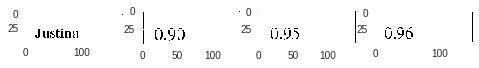

In [24]:
data_dict = {"data" : []}

for i in range(1,n_rows):
  data_dict["data"].append({"id" : i})
  for j in range(n_cols):
    datum = ""
    plt.imsave("temp.png", gray[h_cuts[i]:h_cuts[i+1], v_cuts[j]:v_cuts[j+1]])
    
    datum_txt = !python3 /usr/local/bin/pytesseract -l eng temp.png
    for k in datum_txt:
      datum += str(k) + " "
    datum = datum.strip()
    if i ==2:
      plt.subplot(1, 4, j+1)
      plt.imshow(gray[h_cuts[i]:h_cuts[i+1], v_cuts[j]:v_cuts[j+1]])
      print(datum)
    data_dict["data"][i-1][labels[j]] = datum
    
#print(data_dict)
  

{'id': 1, 'Cultivar': 'Picolo', 'Measured height': '0.93', 'Scanned height': '0.93', 'Estimated ears': '0.97'}
{'id': 2, 'Cultivar': '', 'Measured height': '', 'Scanned height': '', 'Estimated ears': ''}
{'id': 3, 'Cultivar': 'Belinda', 'Measured height': '0.99', 'Scanned height': '0.88', 'Estimated ears': '0.99'}
{'id': 4, 'Cultivar': 'Mean', 'Measured height': '0.94', 'Scanned height': '0.92', 'Estimated ears': '0.98'}


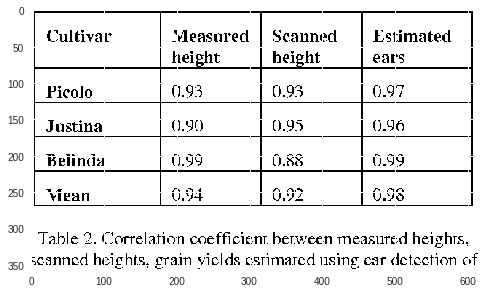

In [25]:
import json

with open("extracteddata.json", "w") as store:
  json.dump(data_dict, store)

with open("extracteddata.json", "r") as store:
  final = json.load( store)
  
plt.imshow(gray)
for row in final["data"]:
  print(row)